<a href="https://colab.research.google.com/github/haruhiysd/QM-Group-Project/blob/main/new_time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving merged_df_3.csv to merged_df_3.csv


In [2]:
import pandas as pd
df = pd.read_csv('merged_df_3.csv')
df.head()

Autonomous_community      Period  Monthly_number_of_tourists  \
0                01 Andalucía  2007-01-01                         NaN   
1                   02 Aragón  2007-01-01                         NaN   
2  03 Asturias, Principado de  2007-01-01                         NaN   
3           04 Balears, Illes  2007-01-01                         NaN   
4                 05 Canarias  2007-01-01                         NaN   

   GDP_per_capita  Unemployment_rate      HPI  total_waste_capita  \
0             NaN                NaN  127.081                 NaN   
1             NaN                NaN  175.582                 NaN   
2             NaN                NaN  138.726                 NaN   
3             NaN                NaN  134.284                 NaN   
4             NaN                NaN  132.560                 NaN   

   Total_mixed_waste  Total_waste_no_CDW_and_other  Yearly_tourist_numbers  
0                NaN                           NaN                     NaN  
1                NaN                           NaN                     NaN  
2                NaN                           NaN                     NaN  
3                NaN                           NaN                     NaN  
4                NaN                           NaN                     NaN

In [4]:

%matplotlib inline
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
import numpy as np
import statistics
import pylab

#pylab.rcParams['figure.figsize'] = (10., 15.)
sns.set(font_scale=1.5)
sns.set_style("white")


In [5]:
df = df[df['Period'] >= '2015-01-01'].reset_index(drop=True)
df

Autonomous_community      Period  Monthly_number_of_tourists  \
0                       01 Andalucía  2015-01-01                         NaN   
1                          02 Aragón  2015-01-01                         NaN   
2         03 Asturias, Principado de  2015-01-01                         NaN   
3                  04 Balears, Illes  2015-01-01                         NaN   
4                        05 Canarias  2015-01-01                         NaN   
...                              ...         ...                         ...   
2139  15 Navarra, Comunidad Foral de  2024-11-01                         NaN   
2140                   16 País Vasco  2024-11-01                         NaN   
2141                    17 Rioja, La  2024-11-01                         NaN   
2142                        Nacional  2024-11-01                   5665204.0   
2143     Otras Comunidades Autónomas  2024-11-01                    564752.0   

      GDP_per_capita  Unemployment_rate     HPI  total_waste_capita  \
0                NaN                NaN  96.637               504.6   
1                NaN                NaN  98.632               427.9   
2                NaN                NaN  97.509               519.4   
3                NaN                NaN  95.424               800.6   
4                NaN                NaN  97.087               594.1   
...              ...                ...     ...                 ...   
2139             NaN                NaN     NaN                 NaN   
2140             NaN                NaN     NaN                 NaN   
2141             NaN                NaN     NaN                 NaN   
2142             NaN                NaN     NaN                 NaN   
2143             NaN                NaN     NaN                 NaN   

      Total_mixed_waste  Total_waste_no_CDW_and_other  Yearly_tourist_numbers  
0             3734660.0                     4132582.0                     NaN  
1              457726.0                      532954.0                     NaN  
2              404159.0                      519529.0                     NaN  
3              766736.0                      892903.0                     NaN  
4             1144978.0                     1253565.0                     NaN  
...                 ...                           ...                     ...  
2139                NaN                           NaN                     NaN  
2140                NaN                           NaN                     NaN  
2141                NaN                           NaN                     NaN  
2142                NaN                           NaN                     NaN  
2143                NaN                           NaN                     NaN  

[2144 rows x 10 columns]

In [6]:
df['Period'] = pd.to_datetime(df['Period'])

In [7]:
df['Monthly_number_of_tourists(millions)'] = df['Monthly_number_of_tourists'] / 1000000


In [111]:
df['Autonomous_community'] = df['Autonomous_community'].replace('Otras Comunidades Autónomas', 'Other Autonomous Communities')

In [112]:
df_filtered_monthly_tourists = df.dropna(subset=['Monthly_number_of_tourists(millions)'])


In [10]:
print(df['Period'].dtype)

datetime64[ns]


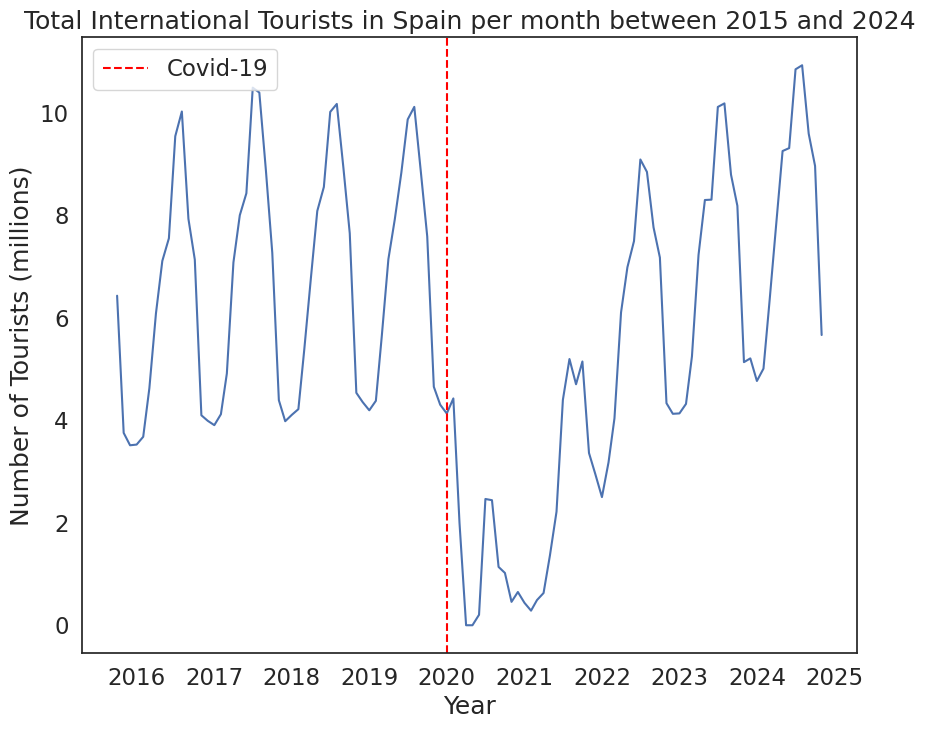

In [102]:
pylab.rcParams['figure.figsize'] = (10, 8)


sns.lineplot(data=df_filtered_monthly_tourists[(df_filtered_monthly_tourists['Autonomous_community'] == 'Nacional')], x='Period', y='Monthly_number_of_tourists(millions)', hue='Autonomous_community')

# Customize the plot
plt.title('Total International Tourists in Spain per month between 2015 and 2024')
plt.xlabel('Year')
plt.ylabel('Number of Tourists (millions)')

# Highlight Covid
line = plt.axvline(x=pd.to_datetime('2020-01-01'),color='red',linestyle='dashed', label='Covid-19')
# Add a label to the axvline:
plt.legend(handles=[line], loc='upper left')


#Display the plot
plt.show()


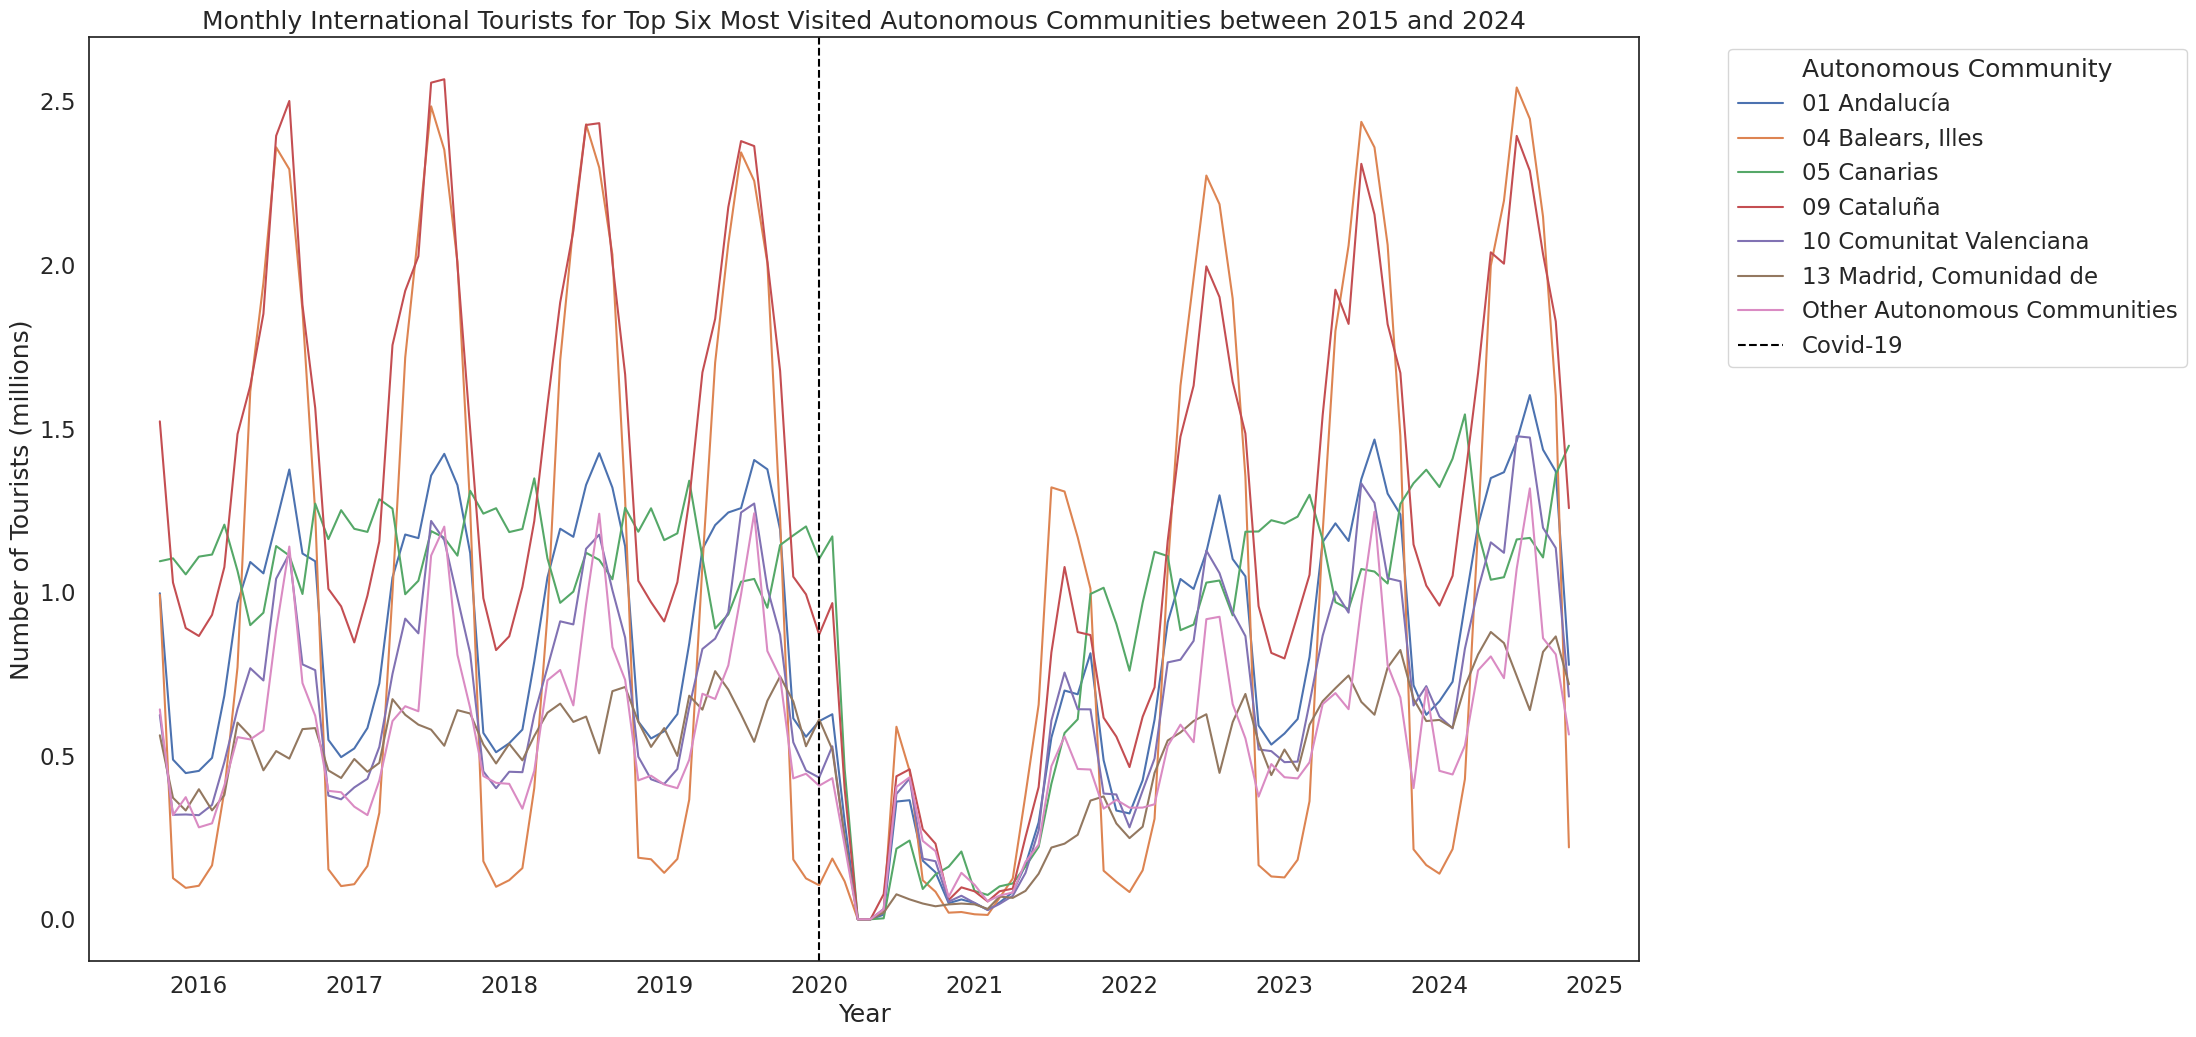

In [113]:
pylab.rcParams['figure.figsize'] = (20, 12)


sns.lineplot(data=df_filtered_monthly_tourists[(df_filtered_monthly_tourists['Autonomous_community'] != 'Nacional')], x='Period', y='Monthly_number_of_tourists(millions)', hue='Autonomous_community')

# Customize the plot
plt.title('Monthly International Tourists for Top Six Most Visited Autonomous Communities between 2015 and 2024')
plt.xlabel('Year')
plt.ylabel('Number of Tourists (millions)')

# Highlight Covid
plt.axvline(x=pd.to_datetime('2020-01-01'),color='black',linestyle='dashed', label='Covid-19')

plt.legend(title='Autonomous Community', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.figure(figsize=(12, 20))


#Display the plot
plt.show()


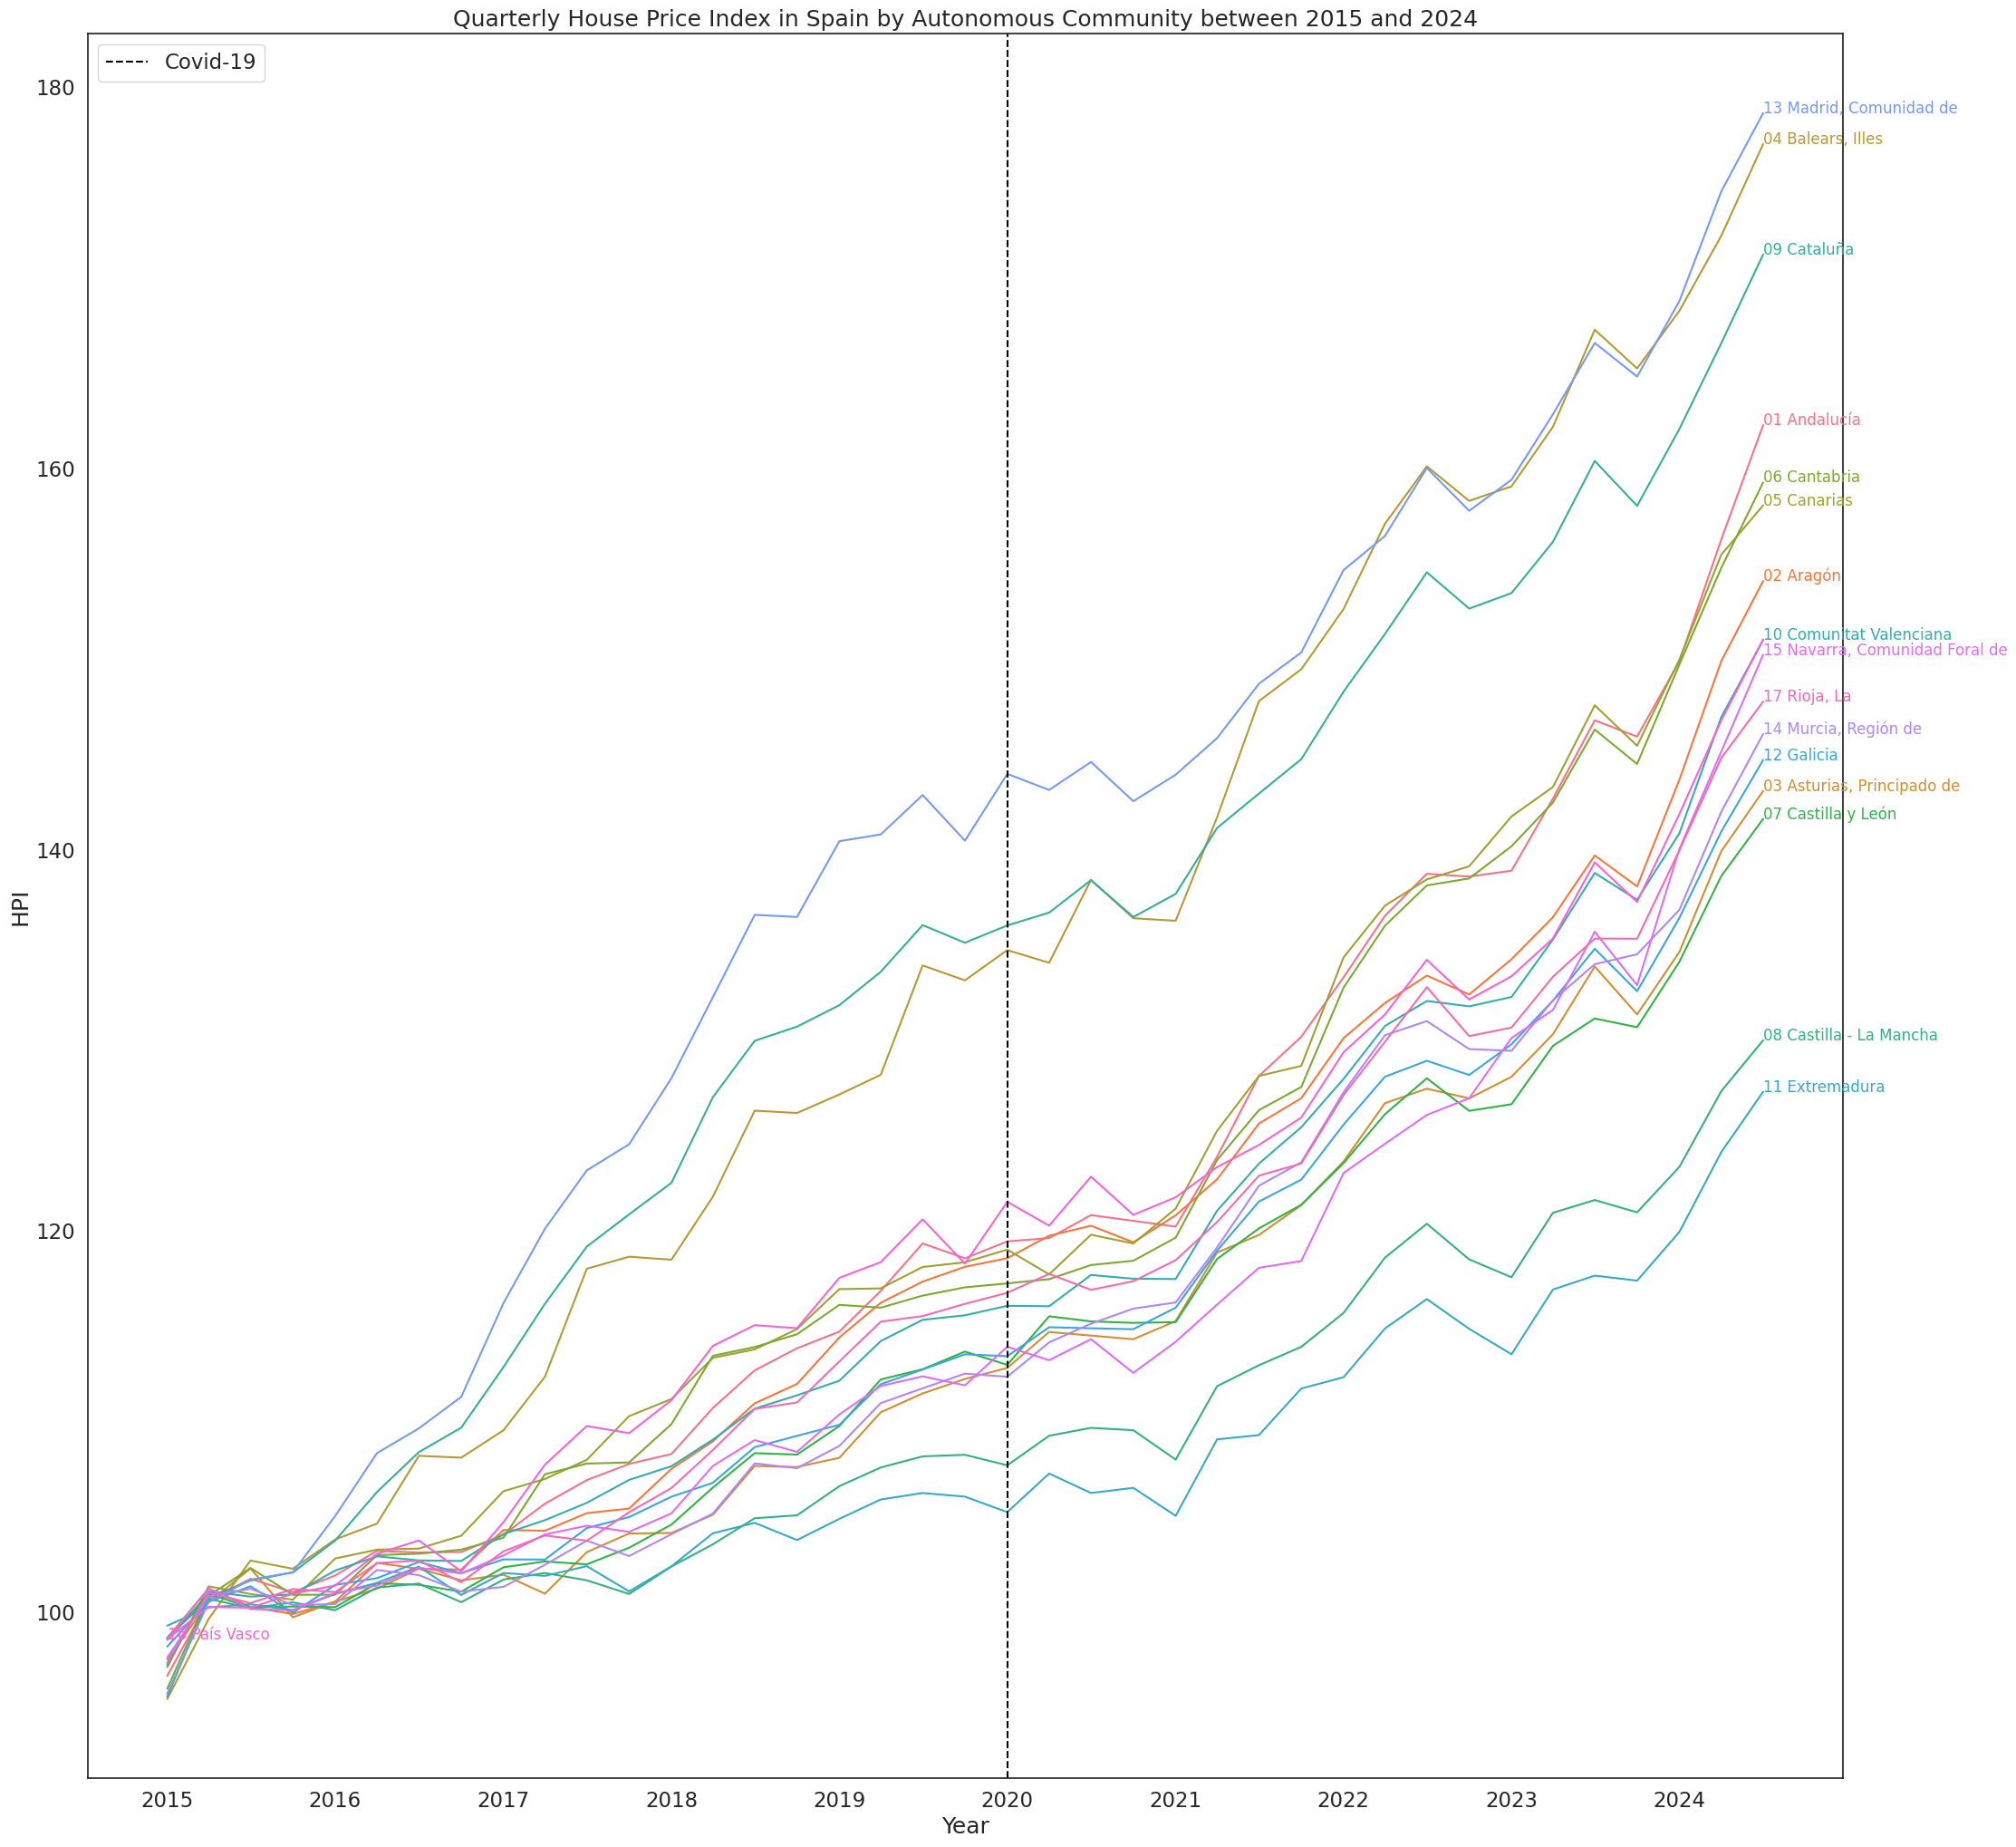

In [145]:
pylab.rcParams['figure.figsize'] = (25,25)
df_filtered_HPI = df.dropna(subset=['HPI'])
sns.lineplot(data=df_filtered_HPI[(df_filtered_HPI['Autonomous_community'] != 'Nacional')], x='Period', y='HPI', hue='Autonomous_community')

# Customize the plot
plt.title('Quarterly House Price Index in Spain by Autonomous Community between 2015 and 2024')
plt.xlabel('Year')
plt.ylabel('HPI')

line = plt.axvline(x=pd.to_datetime('2020-01-01'),color='black',linestyle='dashed', label='Covid-19')
# Add a label to the axvline:
plt.legend(handles=[line], loc='upper left')

# Communities to label on the left (start)
left_communities = ['16 País Vasco']

# Communities to label on the right (end)
right_communities = ['01 Andalucía', '07 Castilla y León',
 '04 Balears, Illes', '05 Canarias', '06 Cantabria', '08 Castilla - La Mancha', '09 Cataluña', '10 Comunitat Valenciana',
 '11 Extremadura',  '13 Madrid, Comunidad de', '14 Murcia, Región de', '15 Navarra, Comunidad Foral de',
 '17 Rioja, La', '12 Galicia', '03 Asturias, Principado de','02 Aragón']

# Label each line directly with white background, alternating start and end
for line, name in zip(plt.gca().lines, df_filtered_HPI['Autonomous_community'].unique()):
    ydata = line.get_ydata()
    xdata = line.get_xdata()

    # Check if ydata and xdata are not empty before accessing elements
    if len(ydata) > 0 and len(xdata) > 0:
        if name in left_communities:
            y = ydata[0]  # Label at the beginning for left communities
            x = xdata[0]
        elif name in right_communities:
            y = ydata[-1]  # Label at the end for right communities
            x = xdata[-1]
        else:
            continue  # Skip labeling for other communities

        plt.text(x, y, name, color=line.get_color(), fontsize=12)


# Display the plot
plt.show()

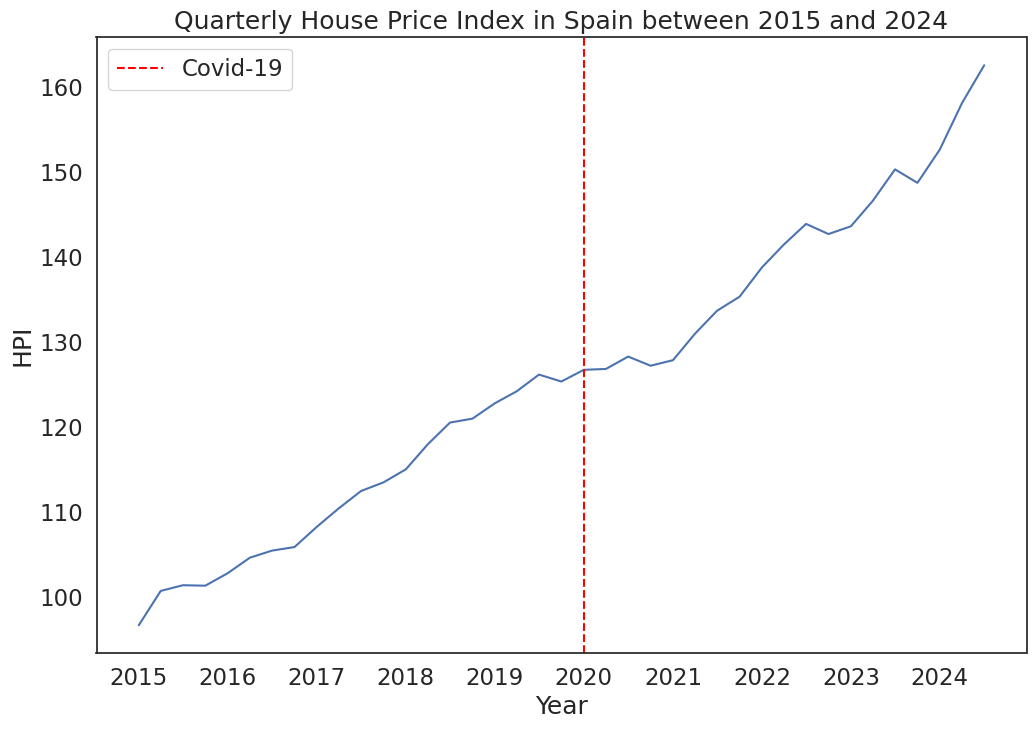

In [186]:
df_filtered_HPI = df.dropna(subset=['HPI'])
pylab.rcParams['figure.figsize'] = (12, 8)


sns.lineplot(data=df_filtered_HPI[(df_filtered_HPI['Autonomous_community'] == 'Nacional')], x='Period', y='HPI', hue='Autonomous_community')

# Customize the plot
plt.title('Quarterly House Price Index in Spain between 2015 and 2024')
plt.xlabel('Year')
plt.ylabel('HPI')

# Highlight Covid
line = plt.axvline(x=pd.to_datetime('2020-01-01'),color='red',linestyle='dashed', label='Covid-19')
# Add a label to the axvline:
plt.legend(handles=[line], loc='upper left')

#Display the plot
plt.show()

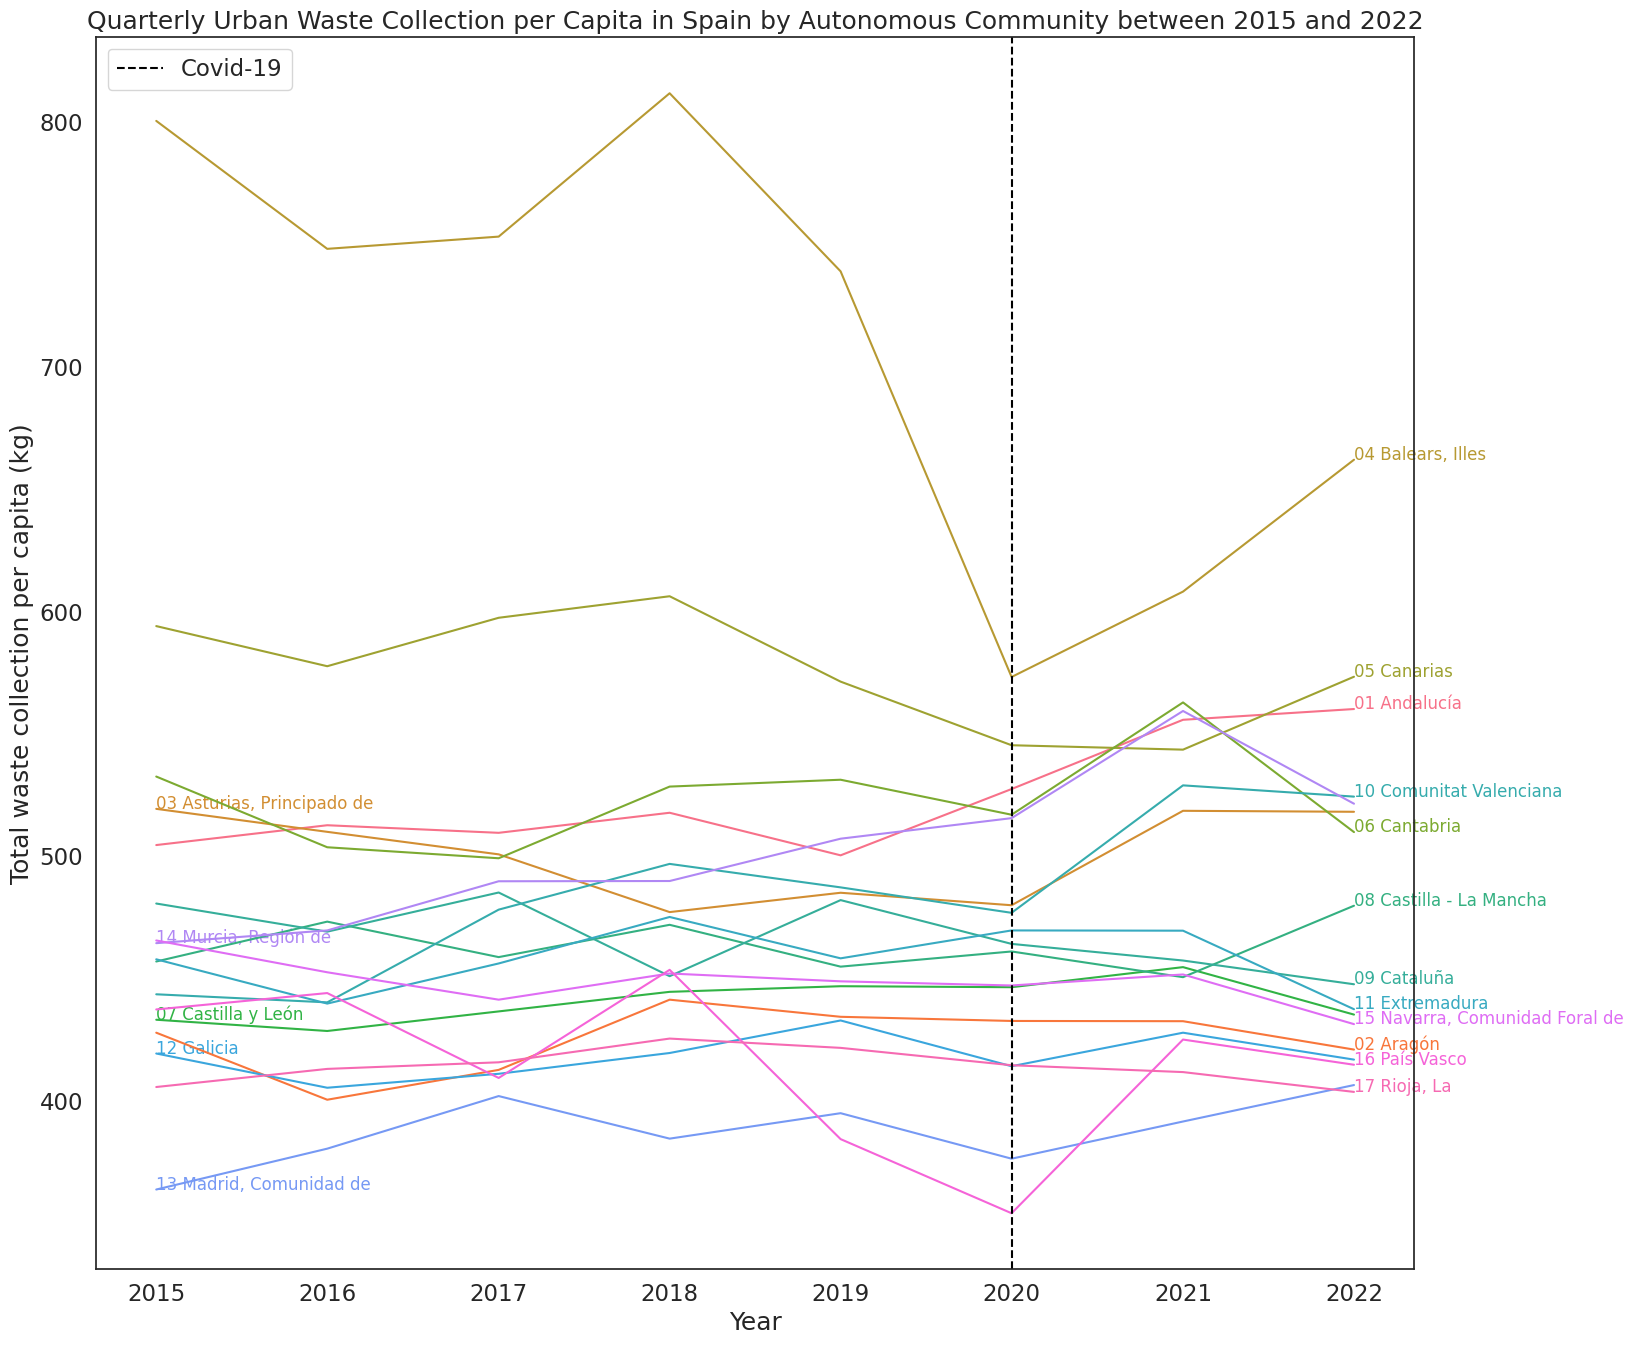

In [140]:
df_filtered_waste_capita = df.dropna(subset=['total_waste_capita'])
pylab.rcParams['figure.figsize'] = (17, 16)


sns.lineplot(data=df_filtered_waste_capita[(df_filtered_waste_capita['Autonomous_community'] != 'Nacional')], x='Period', y='total_waste_capita', hue='Autonomous_community')


plt.title('Quarterly Urban Waste Collection per Capita in Spain by Autonomous Community between 2015 and 2022')
plt.xlabel('Year')
plt.ylabel('Total waste collection per capita (kg)')


line = plt.axvline(x=pd.to_datetime('2020-01-01'),color='black',linestyle='dashed', label='Covid-19')
# Add a label to the axvline:
plt.legend(handles=[line], loc='upper left')

# Communities to label on the left (start)
left_communities = ['12 Galicia', '14 Murcia, Región de', '07 Castilla y León',  '13 Madrid, Comunidad de', '03 Asturias, Principado de']

# Communities to label on the right (end)
right_communities = ['01 Andalucía',
 '04 Balears, Illes', '05 Canarias', '06 Cantabria', '08 Castilla - La Mancha', '09 Cataluña', '10 Comunitat Valenciana',
 '11 Extremadura', '15 Navarra, Comunidad Foral de',
 '17 Rioja, La', '12 Galicia', '16 País Vasco','02 Aragón']

# Label each line directly with white background, alternating start and end
for line, name in zip(plt.gca().lines, df_filtered_HPI['Autonomous_community'].unique()):
    ydata = line.get_ydata()
    xdata = line.get_xdata()

    # Check if ydata and xdata are not empty before accessing elements
    if len(ydata) > 0 and len(xdata) > 0:
        if name in left_communities:
            y = ydata[0]  # Label at the beginning for left communities
            x = xdata[0]
        elif name in right_communities:
            y = ydata[-1]  # Label at the end for right communities
            x = xdata[-1]
        else:
            continue  # Skip labeling for other communities

        plt.text(x, y, name, color=line.get_color(), fontsize=12, zorder=1)

#Display the plot
plt.show()

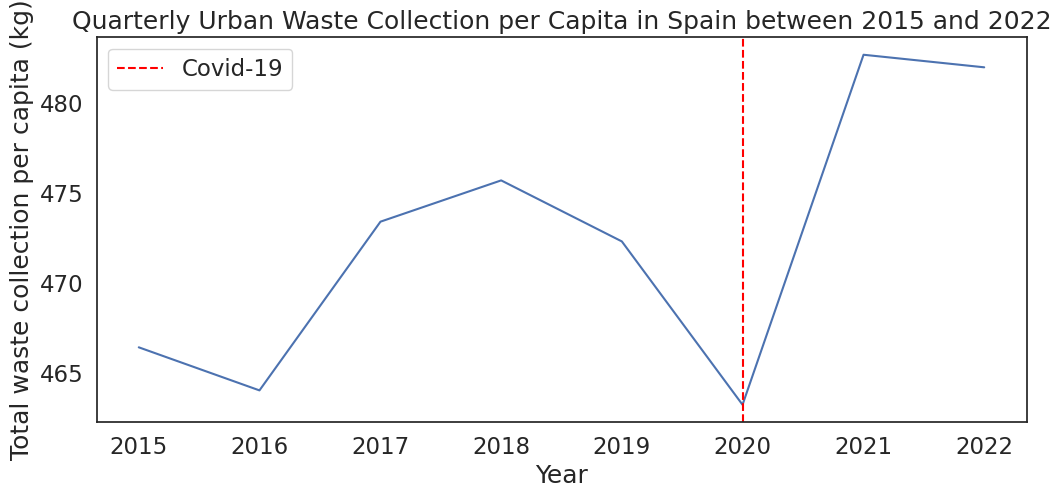

In [132]:
df_filtered_waste_capita = df.dropna(subset=['total_waste_capita'])
pylab.rcParams['figure.figsize'] = (12, 5)


sns.lineplot(data=df_filtered_waste_capita[(df_filtered_waste_capita['Autonomous_community'] == 'Nacional')], x='Period', y='total_waste_capita', hue='Autonomous_community')

# Customize the plot
plt.title('Quarterly Urban Waste Collection per Capita in Spain between 2015 and 2022')
plt.xlabel('Year')
plt.ylabel('Total waste collection per capita (kg)')

# Highlight Covid
line = plt.axvline(x=pd.to_datetime('2020-01-01'),color='red',linestyle='dashed', label='Covid-19')
# Add a label to the axvline:
plt.legend(handles=[line], loc='upper left')

#Display the plot
plt.show()

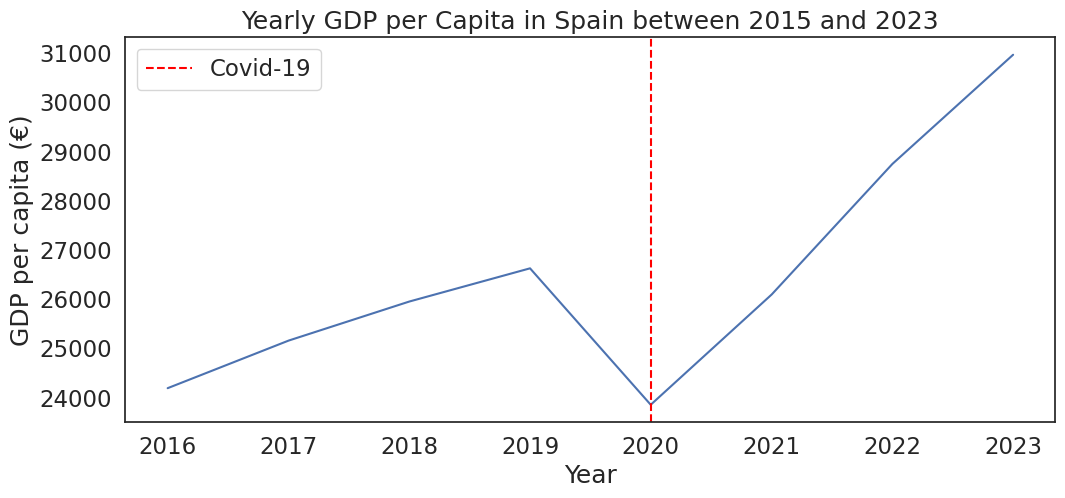

In [151]:
df_yearly = df[df['Period'].dt.month.isin([1])]
df_yearly_filtered_GDP = df_yearly.dropna(subset=['GDP_per_capita'])
pylab.rcParams['figure.figsize'] = (12, 5)


sns.lineplot(data=df_yearly_filtered_GDP[(df_yearly_filtered_GDP['Autonomous_community'] == 'Nacional')], x='Period', y='GDP_per_capita', hue='Autonomous_community')

# Customize the plot
plt.title('Yearly GDP per Capita in Spain between 2015 and 2023')
plt.xlabel('Year')
plt.ylabel('GDP per capita (€)')

# Highlight Covid
line = plt.axvline(x=pd.to_datetime('2020-01-01'),color='red',linestyle='dashed', label='Covid-19')
# Add a label to the axvline:
plt.legend(handles=[line], loc='upper left')

#Display the plot
plt.show()

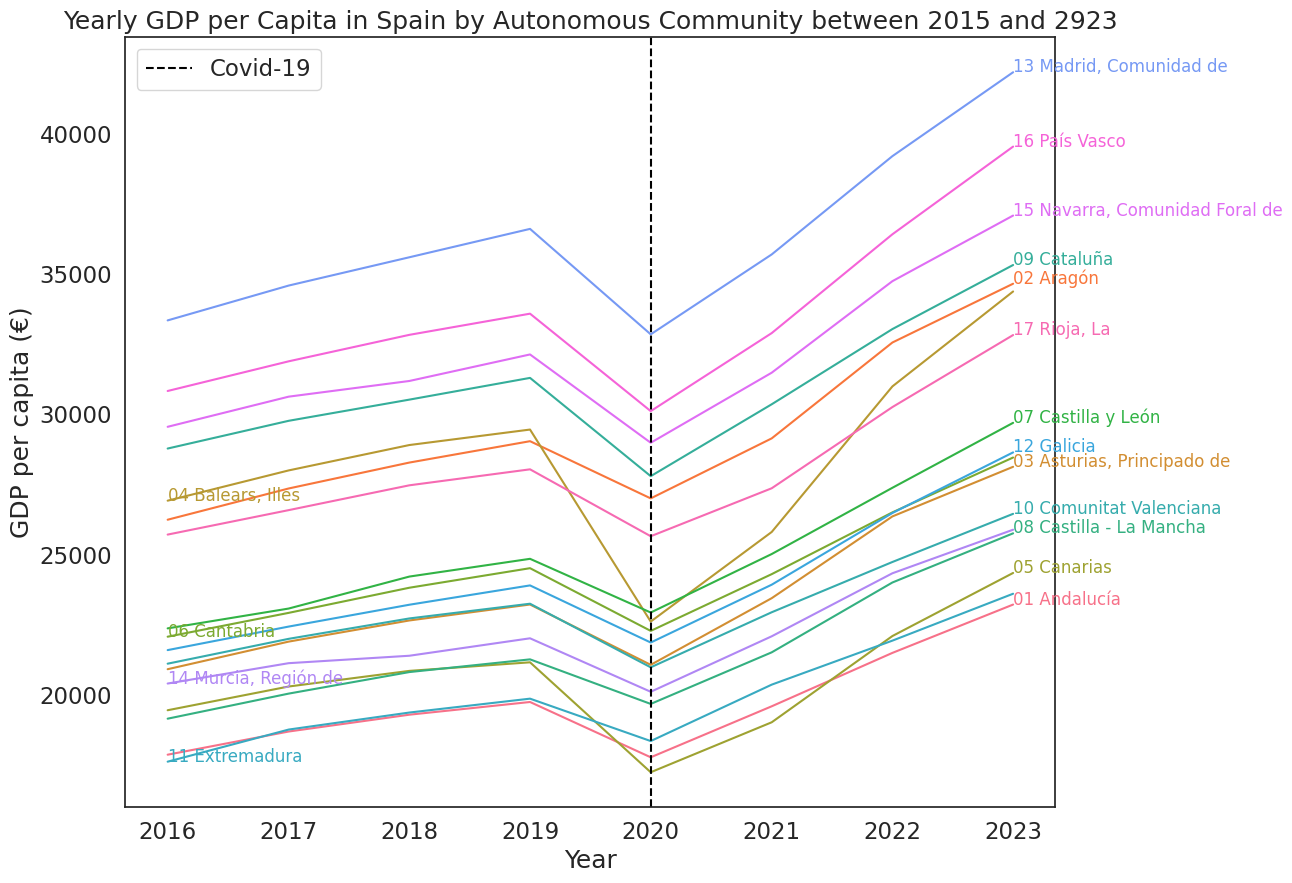

In [150]:
df_yearly = df[df['Period'].dt.month.isin([1])]
df_yearly_filtered_GDP = df_yearly.dropna(subset=['GDP_per_capita'])
pylab.rcParams['figure.figsize'] = (12, 10)


sns.lineplot(data=df_yearly_filtered_GDP[(df_yearly_filtered_GDP['Autonomous_community'] != 'Nacional')], x='Period', y='GDP_per_capita', hue='Autonomous_community')

# Customize the plot
plt.title('Yearly GDP per Capita in Spain by Autonomous Community between 2015 and 2923')
plt.xlabel('Year')
plt.ylabel('GDP per capita (€)')

line = plt.axvline(x=pd.to_datetime('2020-01-01'),color='black',linestyle='dashed', label='Covid-19')
# Add a label to the axvline:
plt.legend(handles=[line], loc='upper left')

# Communities to label on the left (start)
left_communities = ['04 Balears, Illes','06 Cantabria','14 Murcia, Región de', '11 Extremadura']

# Communities to label on the right (end)
right_communities = ['01 Andalucía', '07 Castilla y León',
  '05 Canarias',  '08 Castilla - La Mancha', '09 Cataluña', '10 Comunitat Valenciana',
   '13 Madrid, Comunidad de',  '15 Navarra, Comunidad Foral de',
 '17 Rioja, La', '12 Galicia', '03 Asturias, Principado de','02 Aragón', '16 País Vasco']

# Label each line directly with white background, alternating start and end
for line, name in zip(plt.gca().lines, df_filtered_HPI['Autonomous_community'].unique()):
    ydata = line.get_ydata()
    xdata = line.get_xdata()

    # Check if ydata and xdata are not empty before accessing elements
    if len(ydata) > 0 and len(xdata) > 0:
        if name in left_communities:
            y = ydata[0]  # Label at the beginning for left communities
            x = xdata[0]
        elif name in right_communities:
            y = ydata[-1]  # Label at the end for right communities
            x = xdata[-1]
        else:
            continue  # Skip labeling for other communities

        plt.text(x, y, name, color=line.get_color(), fontsize=12)

#Display the plot
plt.show()

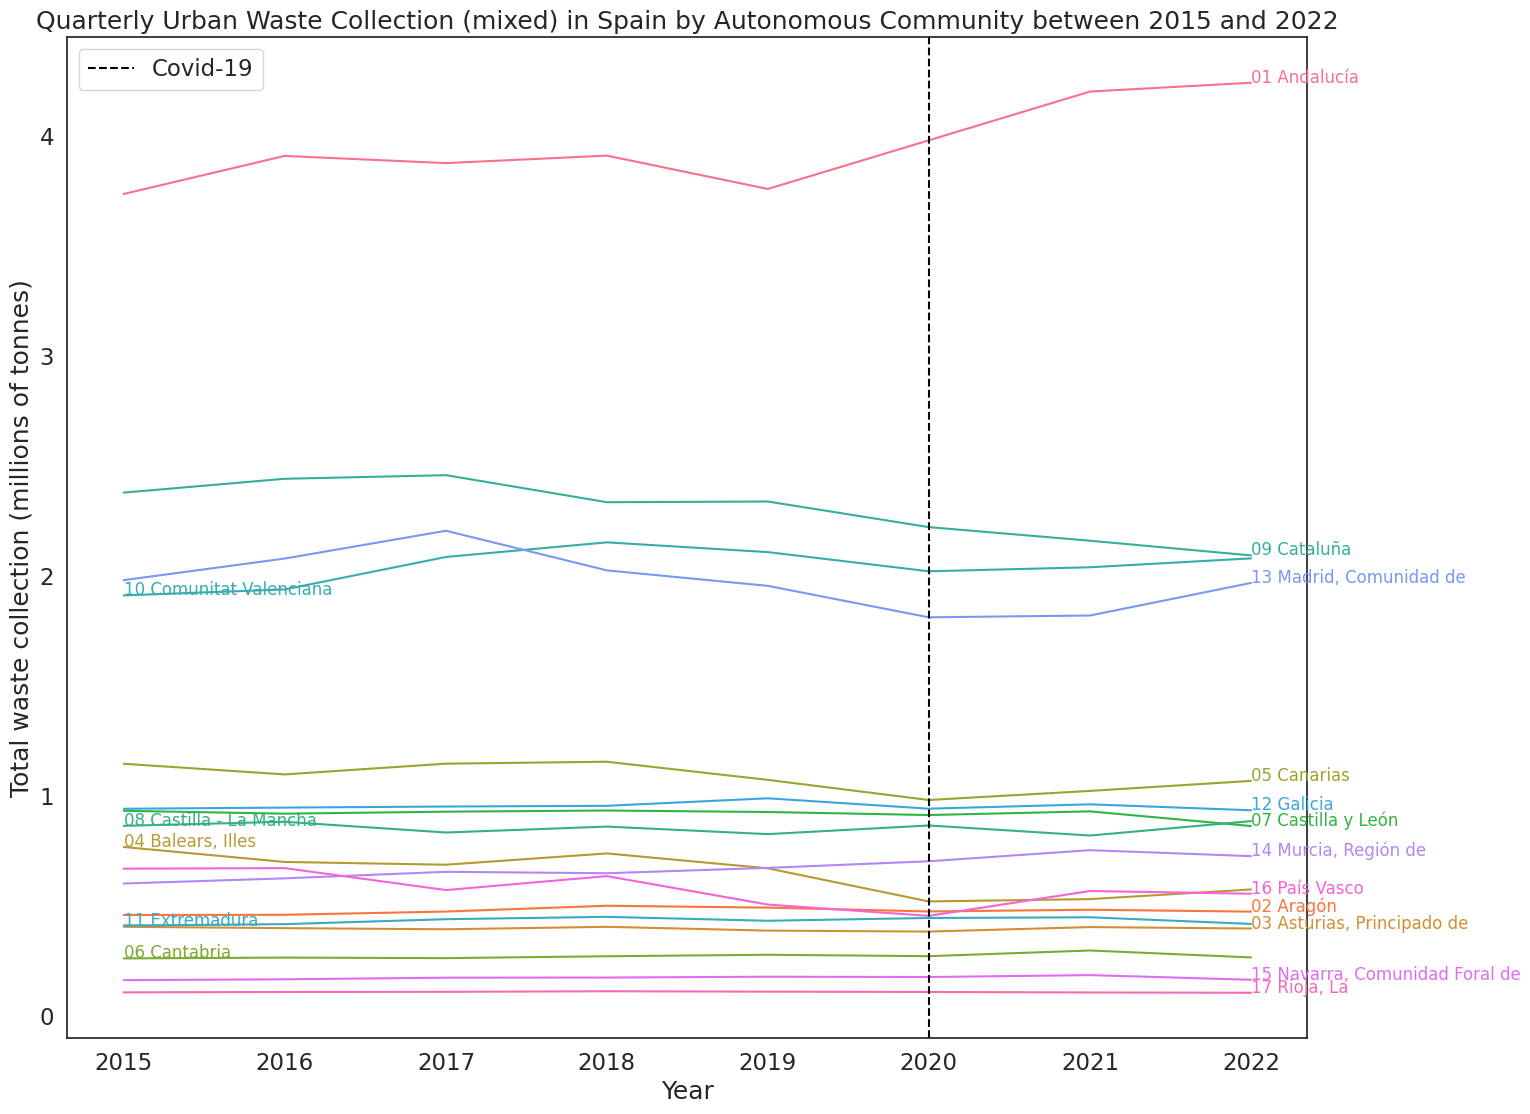

In [162]:
df['Total_mixed_waste(millions)'] = df['Total_mixed_waste'] / 1000000

df_filtered_total_waste = df.dropna(subset=['Total_mixed_waste(millions)'])
pylab.rcParams['figure.figsize'] = (16, 13)


sns.lineplot(data=df_filtered_total_waste[(df_filtered_total_waste['Autonomous_community'] != 'Nacional')], x='Period', y='Total_mixed_waste(millions)', hue='Autonomous_community')

# Customize the plot
plt.title('Quarterly Urban Waste Collection (mixed) in Spain by Autonomous Community between 2015 and 2022')
plt.xlabel('Year')
plt.ylabel('Total waste collection (millions of tonnes)')

line = plt.axvline(x=pd.to_datetime('2020-01-01'),color='black',linestyle='dashed', label='Covid-19')
# Add a label to the axvline:
plt.legend(handles=[line], loc='upper left')

# Communities to label on the left (start)
left_communities = ['04 Balears, Illes','06 Cantabria', '11 Extremadura', '10 Comunitat Valenciana', '08 Castilla - La Mancha']

# Communities to label on the right (end)
right_communities = ['01 Andalucía', '07 Castilla y León','05 Canarias', '09 Cataluña','13 Madrid, Comunidad de', '15 Navarra, Comunidad Foral de',
 '17 Rioja, La', '12 Galicia', '03 Asturias, Principado de','02 Aragón', '16 País Vasco', '14 Murcia, Región de']

# Label each line directly with white background, alternating start and end
for line, name in zip(plt.gca().lines, df_filtered_HPI['Autonomous_community'].unique()):
    ydata = line.get_ydata()
    xdata = line.get_xdata()

    # Check if ydata and xdata are not empty before accessing elements
    if len(ydata) > 0 and len(xdata) > 0:
        if name in left_communities:
            y = ydata[0]  # Label at the beginning for left communities
            x = xdata[0]
        elif name in right_communities:
            y = ydata[-1]  # Label at the end for right communities
            x = xdata[-1]
        else:
            continue  # Skip labeling for other communities

        plt.text(x, y, name, color=line.get_color(), fontsize=12)

#Display the plot
plt.show()

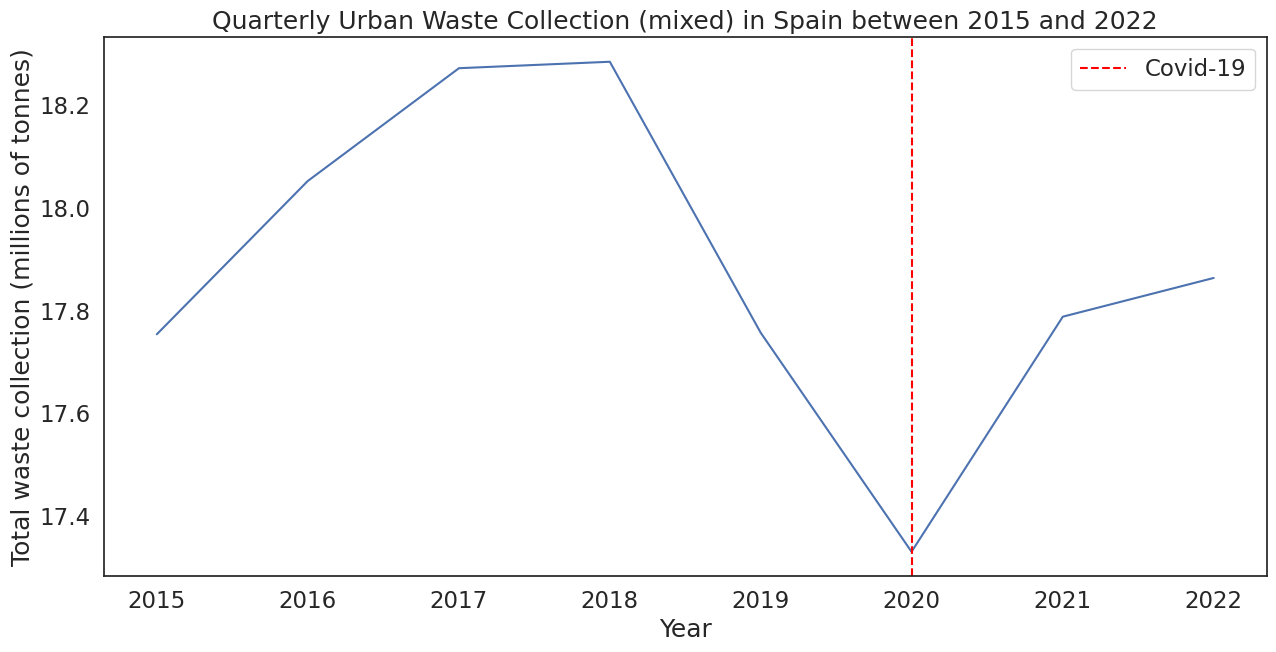

In [177]:
df_filtered_total_waste = df.dropna(subset=['Total_mixed_waste(millions)'])
pylab.rcParams['figure.figsize'] = (15, 7)


sns.lineplot(data=df_filtered_total_waste[(df_filtered_total_waste['Autonomous_community'] == 'Nacional')], x='Period', y='Total_mixed_waste(millions)', hue='Autonomous_community')

# Customize the plot
plt.title('Quarterly Urban Waste Collection (mixed) in Spain between 2015 and 2022')
plt.xlabel('Year')
plt.ylabel('Total waste collection (millions of tonnes)')

# Highlight Covid
line = plt.axvline(x=pd.to_datetime('2020-01-01'),color='red',linestyle='dashed', label='Covid-19')
# Add a label to the axvline:
plt.legend(handles=[line], loc='upper right')

#Display the plot
plt.show()

In [168]:
#filter monthly tourism data for quarterly
df_quarterly = df[df['Period'].dt.month.isin([1, 4, 7, 10])]

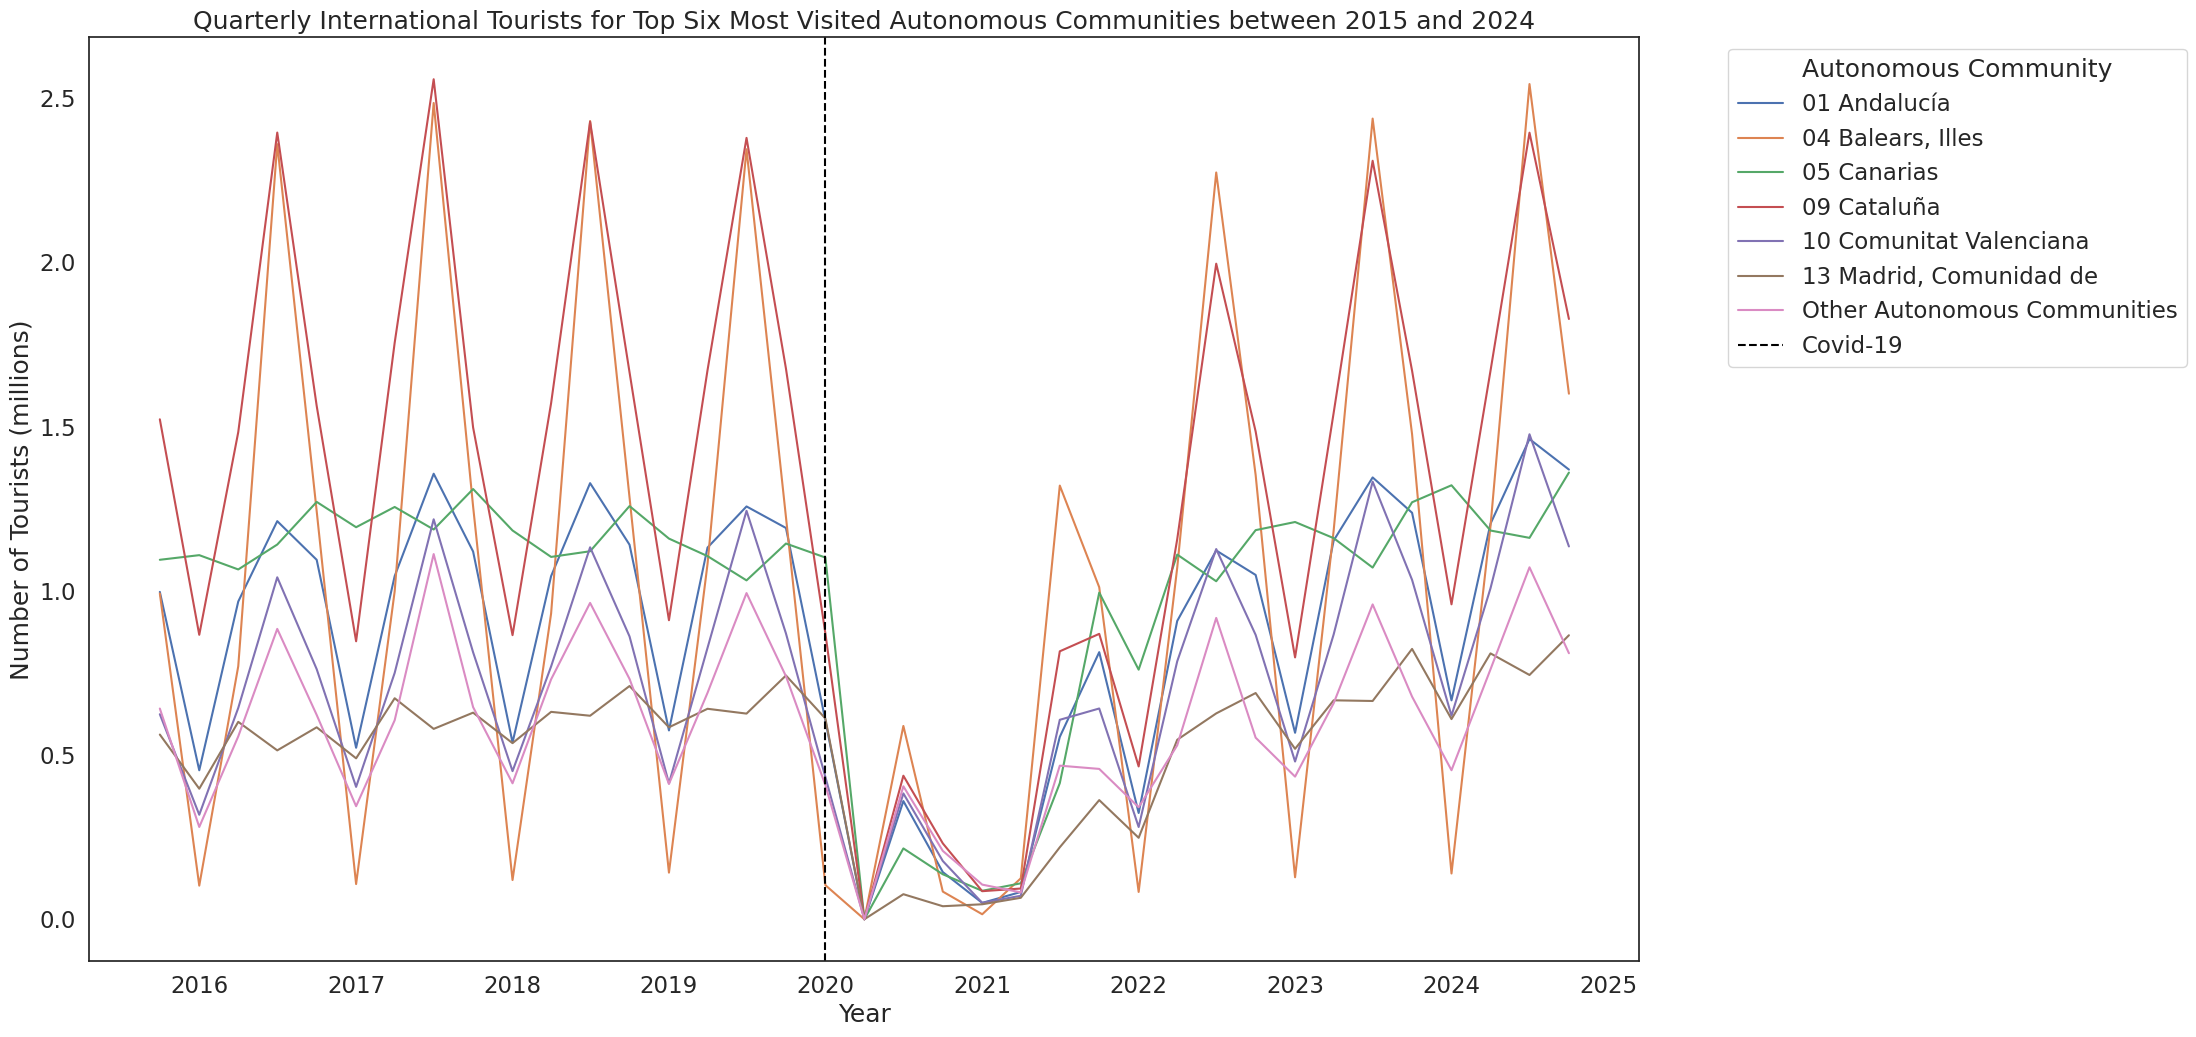

In [174]:
df_filtered_quarterly_tourists = df_quarterly.dropna(subset=['Monthly_number_of_tourists(millions)'])
pylab.rcParams['figure.figsize'] = (20, 12)


sns.lineplot(data=df_filtered_quarterly_tourists[(df_filtered_quarterly_tourists['Autonomous_community'] != 'Nacional')], x='Period', y='Monthly_number_of_tourists(millions)', hue='Autonomous_community')

# Customize the plot
plt.title('Quarterly International Tourists for Top Six Most Visited Autonomous Communities between 2015 and 2024')
plt.xlabel('Year')
plt.ylabel('Number of Tourists (millions)')

# Highlight Covid
#plt.axvline(x='2020-01-01',color='black',linestyle='dashed', label='Covid')
plt.axvline(x=pd.to_datetime('2020-01-01'),color='black',linestyle='dashed', label='Covid-19')
# Add a label to the axvline:

plt.legend(title='Autonomous Community', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.figure(figsize=(12, 20))


#Display the plot
plt.show()

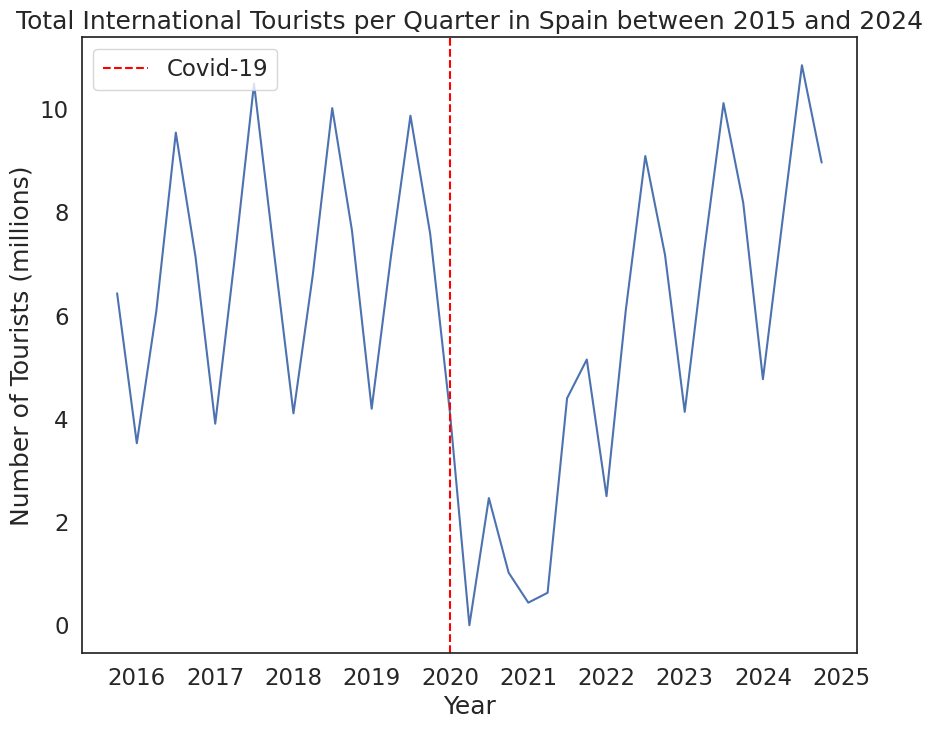

In [172]:
pylab.rcParams['figure.figsize'] = (10, 8)


sns.lineplot(data=df_filtered_quarterly_tourists[(df_filtered_quarterly_tourists['Autonomous_community'] == 'Nacional')], x='Period', y='Monthly_number_of_tourists(millions)', hue='Autonomous_community')

# Customize the plot
plt.title('Total International Tourists per Quarter in Spain between 2015 and 2024')
plt.xlabel('Year')
plt.ylabel('Number of Tourists (millions)')

# Highlight Covid
#plt.axvline(x='2020-01-01',color='black',linestyle='dashed', label='Covid')

# Highlight Covid
line = plt.axvline(x=pd.to_datetime('2020-01-01'),color='red',linestyle='dashed', label='Covid-19')
# Add a label to the axvline:
plt.legend(handles=[line], loc='upper left')


#Display the plot
plt.show()

In [173]:
#df_filtered_unemployment = df.dropna(subset=['Unemployment_rate'])
#pylab.rcParams['figure.figsize'] = (12, 12)


#sns.lineplot(data=df_filtered_unemployment[(df_filtered_unemployment['Autonomous_community'] != 'Nacional')], x='Period', y='Unemployment_rate', hue='Autonomous_community')

# Customize the plot
#plt.title('Quarterly Unemployment Rate in Spain by Autonomous Community (2015-2024)')
#plt.xlabel('Year')
#plt.ylabel('Unemployment rate')

#plt.legend(title='Autonomous Community', bbox_to_anchor=(1.05, 1), loc='upper left')

#Display the plot
#plt.show()

In [55]:
print(df['Autonomous_community'].unique())

['01 Andalucía' '02 Aragón' '03 Asturias, Principado de'
 '04 Balears, Illes' '05 Canarias' '06 Cantabria' '07 Castilla y León'
 '08 Castilla - La Mancha' '09 Cataluña' '10 Comunitat Valenciana'
 '11 Extremadura' '12 Galicia' '13 Madrid, Comunidad de'
 '14 Murcia, Región de' '15 Navarra, Comunidad Foral de' '16 País Vasco'
 '17 Rioja, La' 'Nacional' 'Otras Comunidades Autónomas']


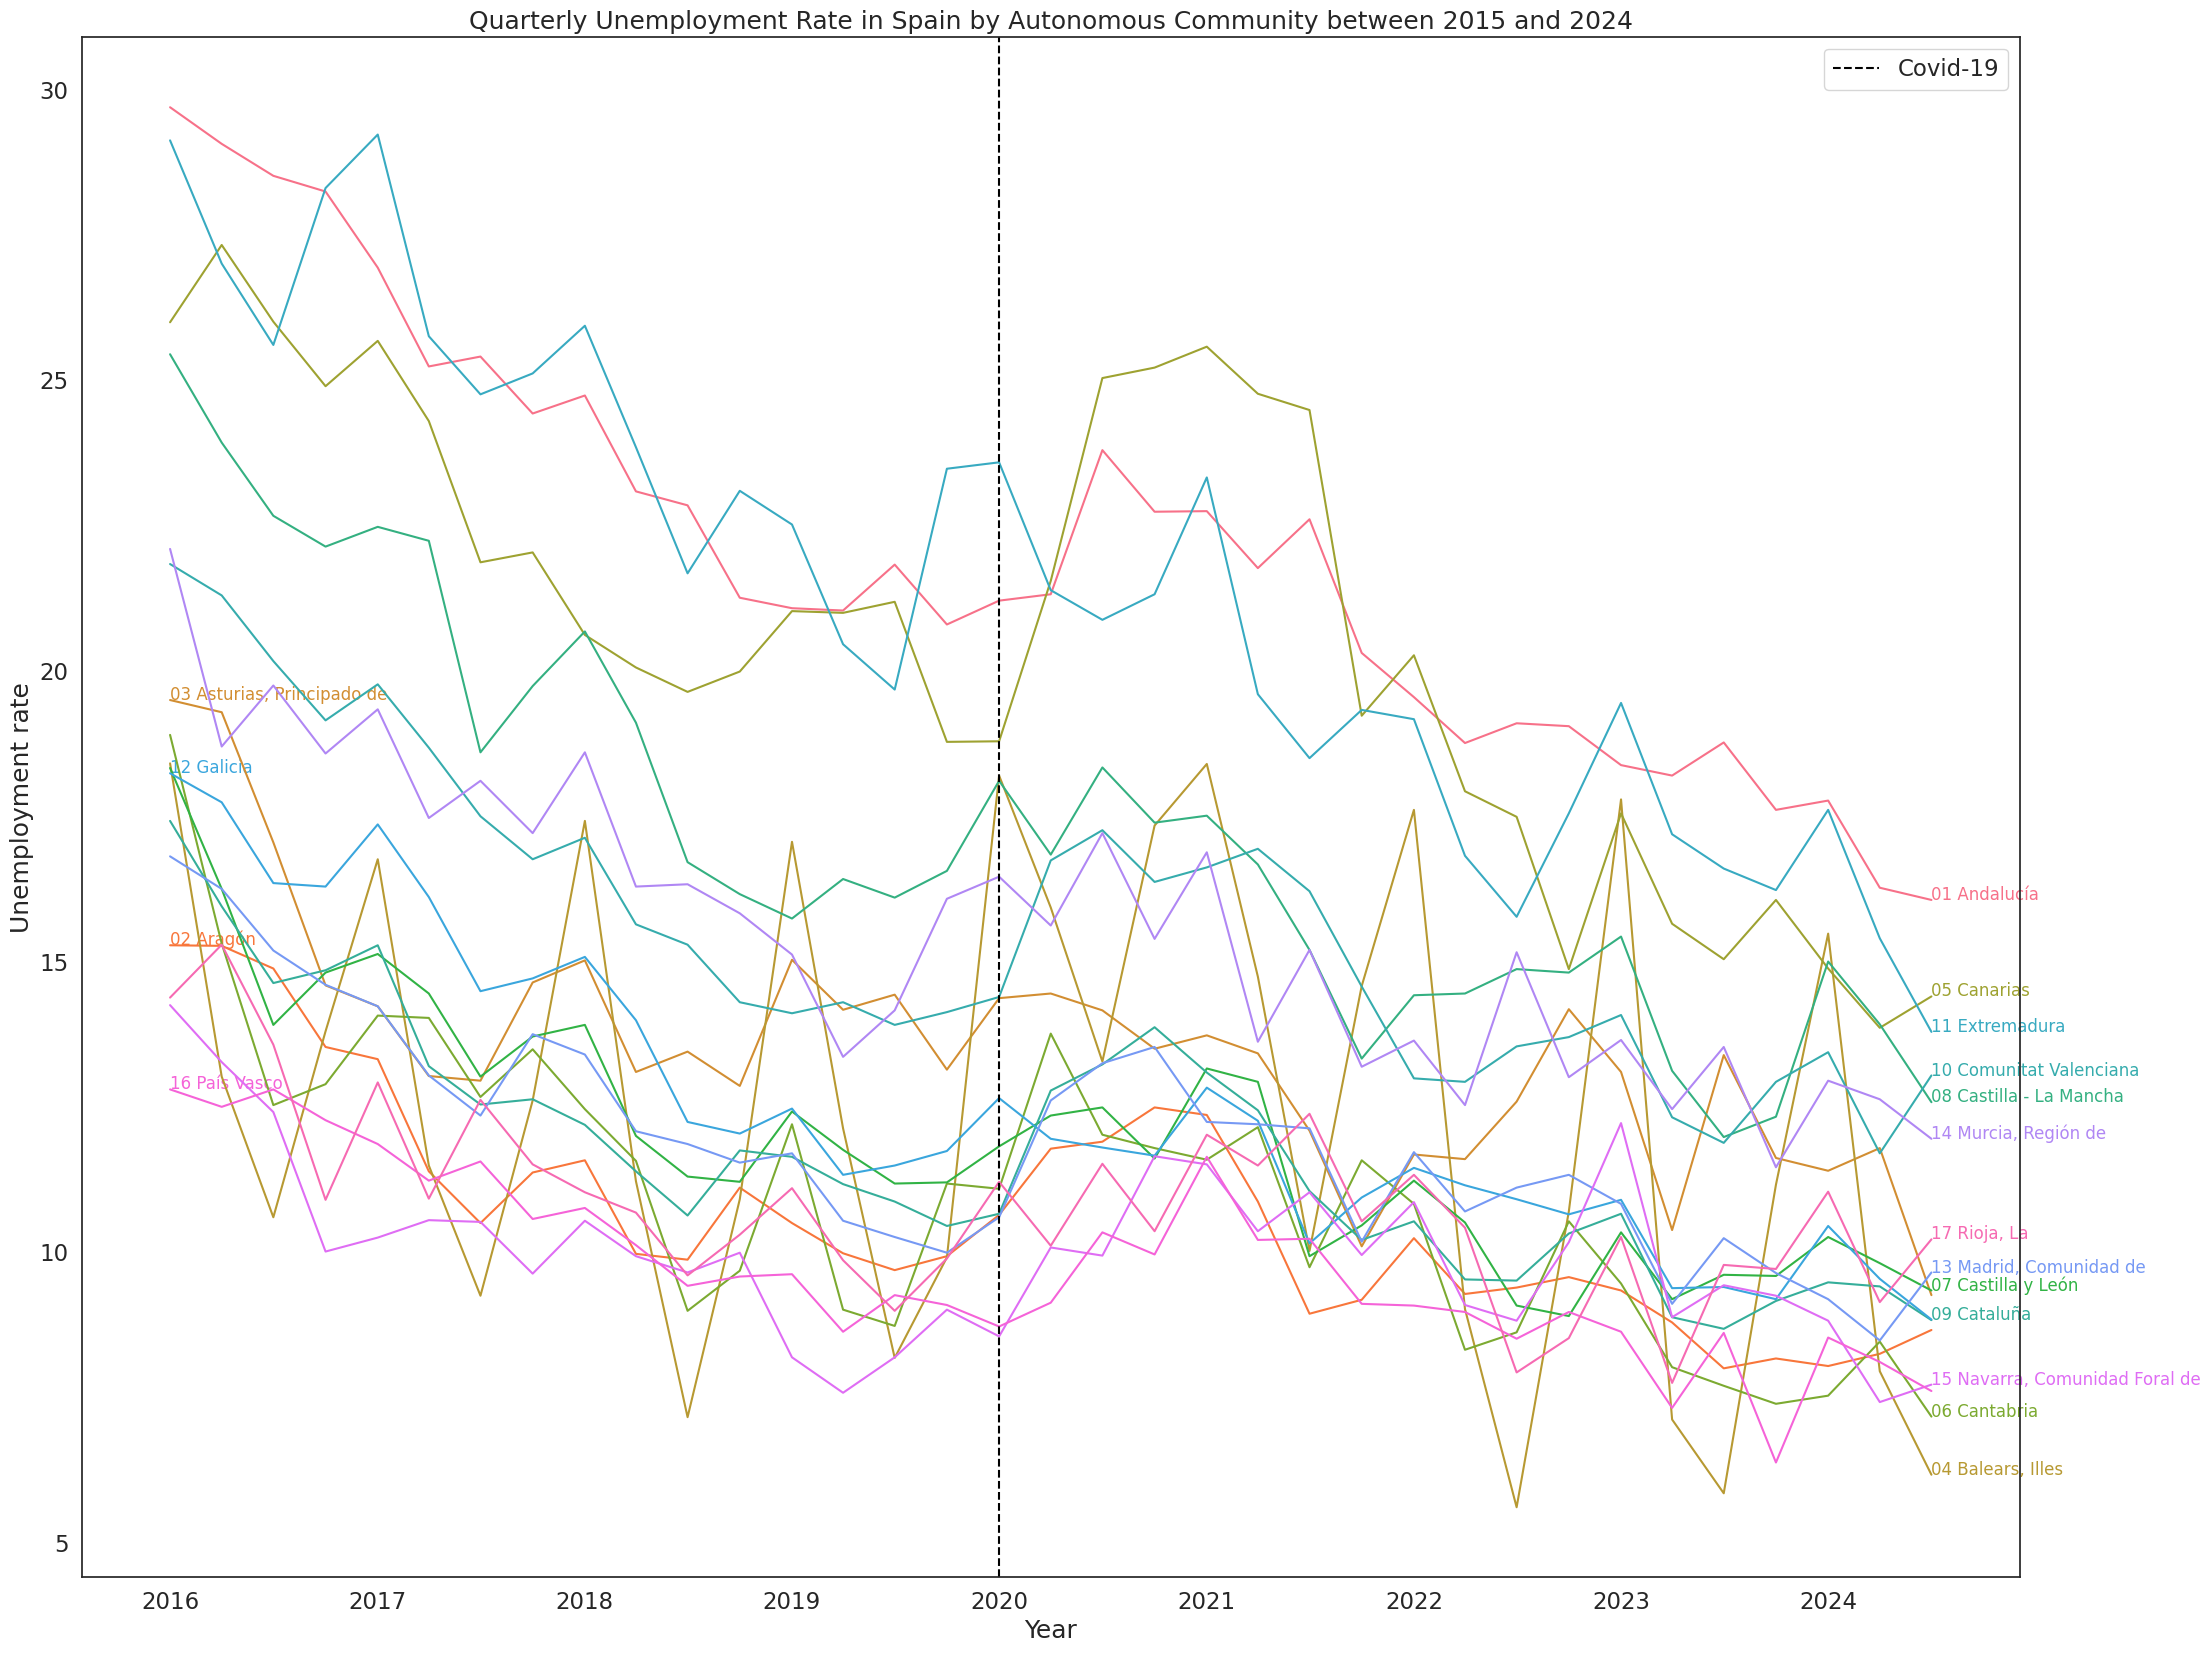

In [180]:
pylab.rcParams['figure.figsize'] = (25,20)

# Create the line plot
sns.lineplot(data=df_filtered_unemployment[(df_filtered_unemployment['Autonomous_community'] != 'Nacional')], x='Period', y='Unemployment_rate', hue='Autonomous_community')

# Customize the plot
plt.title('Quarterly Unemployment Rate in Spain by Autonomous Community between 2015 and 2024')
plt.xlabel('Year')
plt.ylabel('Unemployment rate')


line = plt.axvline(x=pd.to_datetime('2020-01-01'),color='black',linestyle='dashed', label='Covid-19')
# Add a label to the axvline:
plt.legend(handles=[line], loc='upper right')

# Communities to label on the left (start)
left_communities = ['12 Galicia', '16 País Vasco', '03 Asturias, Principado de','02 Aragón']

# Communities to label on the right (end)
right_communities = ['01 Andalucía', '07 Castilla y León',
 '04 Balears, Illes', '05 Canarias', '06 Cantabria', '08 Castilla - La Mancha', '09 Cataluña', '10 Comunitat Valenciana',
 '11 Extremadura',  '13 Madrid, Comunidad de', '14 Murcia, Región de', '15 Navarra, Comunidad Foral de',
 '17 Rioja, La']

# Label each line directly with white background, alternating start and end
for line, name in zip(plt.gca().lines, df_yearly_filtered_GDP['Autonomous_community'].unique()):
    ydata = line.get_ydata()
    xdata = line.get_xdata()

    # Check if ydata and xdata are not empty before accessing elements
    if len(ydata) > 0 and len(xdata) > 0:
        if name in left_communities:
            y = ydata[0]  # Label at the beginning for left communities
            x = xdata[0]
        elif name in right_communities:
            y = ydata[-1]  # Label at the end for right communities
            x = xdata[-1]
        else:
            continue  # Skip labeling for other communities

        plt.text(x, y, name, color=line.get_color(), fontsize=12, zorder=1)


# Display the plot
plt.show()

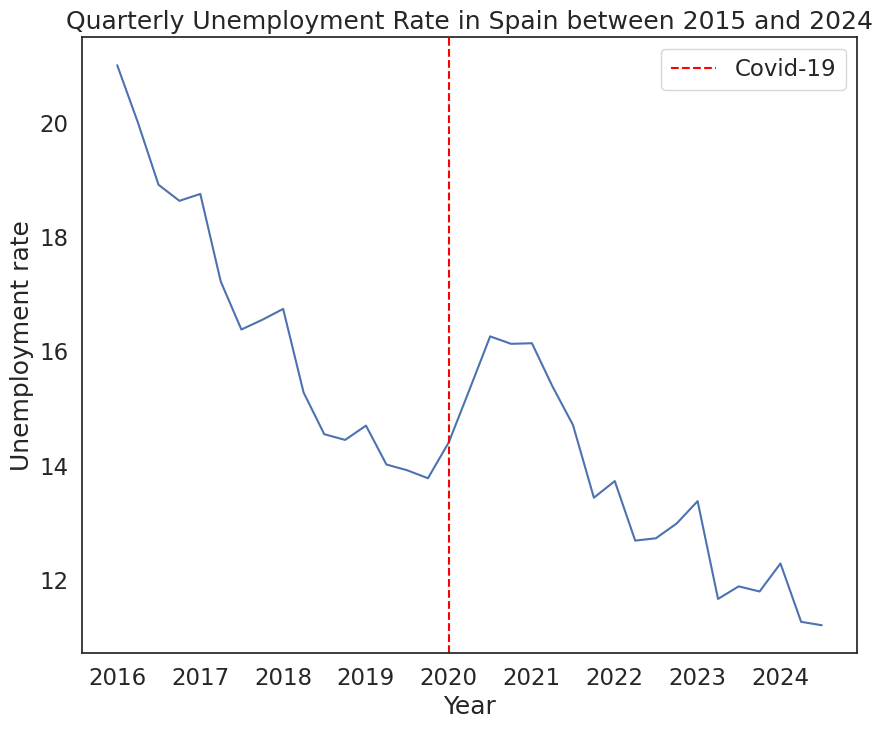

In [181]:
df_filtered_unemployment = df.dropna(subset=['Unemployment_rate'])
pylab.rcParams['figure.figsize'] = (10,8)


sns.lineplot(data=df_filtered_unemployment[(df_filtered_unemployment['Autonomous_community'] == 'Nacional')], x='Period', y='Unemployment_rate', hue='Autonomous_community')

# Customize the plot
plt.title('Quarterly Unemployment Rate in Spain between 2015 and 2024')
plt.xlabel('Year')
plt.ylabel('Unemployment rate')

# Highlight Covid
line = plt.axvline(x=pd.to_datetime('2020-01-01'),color='red',linestyle='dashed', label='Covid-19')
# Add a label to the axvline:
plt.legend(handles=[line], loc='upper right')

#Display the plot
plt.show()

In [183]:
communities_ranked_by_total_tourists = df.groupby('Autonomous_community')['Yearly_tourist_numbers'].sum().sort_values(ascending=False)
print(communities_ranked_by_total_tourists)

Autonomous_community
Nacional                          530443332.0
09 Cataluña                       118521844.0
04 Balears, Illes                  89995455.0
05 Canarias                        89697330.0
01 Andalucía                       74961721.0
10 Comunitat Valenciana            61053269.0
13 Madrid, Comunidad de            45053329.0
16 País Vasco                      10803672.0
12 Galicia                          9664734.0
07 Castilla y León                  8508026.0
14 Murcia, Región de                6549739.0
02 Aragón                           3497098.0
06 Cantabria                        2590777.0
11 Extremadura                      2554624.0
15 Navarra, Comunidad Foral de      2279754.0
03 Asturias, Principado de          2095846.0
08 Castilla - La Mancha             1557073.0
17 Rioja, La                         874777.0
Other Autonomous Communities              0.0
Name: Yearly_tourist_numbers, dtype: float64
